In [1]:
import re
import glob
import codecs
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import utils
from sklearn.tree import DecisionTreeClassifier
import pickle

np.random.seed(100)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Import Data

In [2]:
import pickle
with open('enron_email.df', 'rb') as handle:
    data = pickle.load(handle)

X = data['Text']
Y = data['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=.75)

# TfidfVectorizer
The goal of using tf-idf instead of the raw frequencies of occurrence of a token in a given document is to scale down the impact of tokens that occur very frequently in a given corpus

In [18]:
# convert to binary matrix, english stopwords
tfidf_vectorizer = TfidfVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=None)
X_idf = tfidf_vectorizer.fit_transform(X)
# split test train
X_train, X_test, Y_train, Y_test = train_test_split(X_bin, Y, train_size=.75)

In [19]:
len(tfidf_vectorizer.vocabulary_)

2019272

# Use Full Features
### Logistic Regression

In [ ]:


# build logistic regression model
model = LogisticRegression()
model.fit(X_train_tfidf, Y_train)
# print AUC curve
pred = model.predict_proba(X_test_tfidf)[:,1]
utils.plotAUC(Y_test, pred, 'Logistics Reg, All Features')

# Feature Selections
#### Logistic Regression

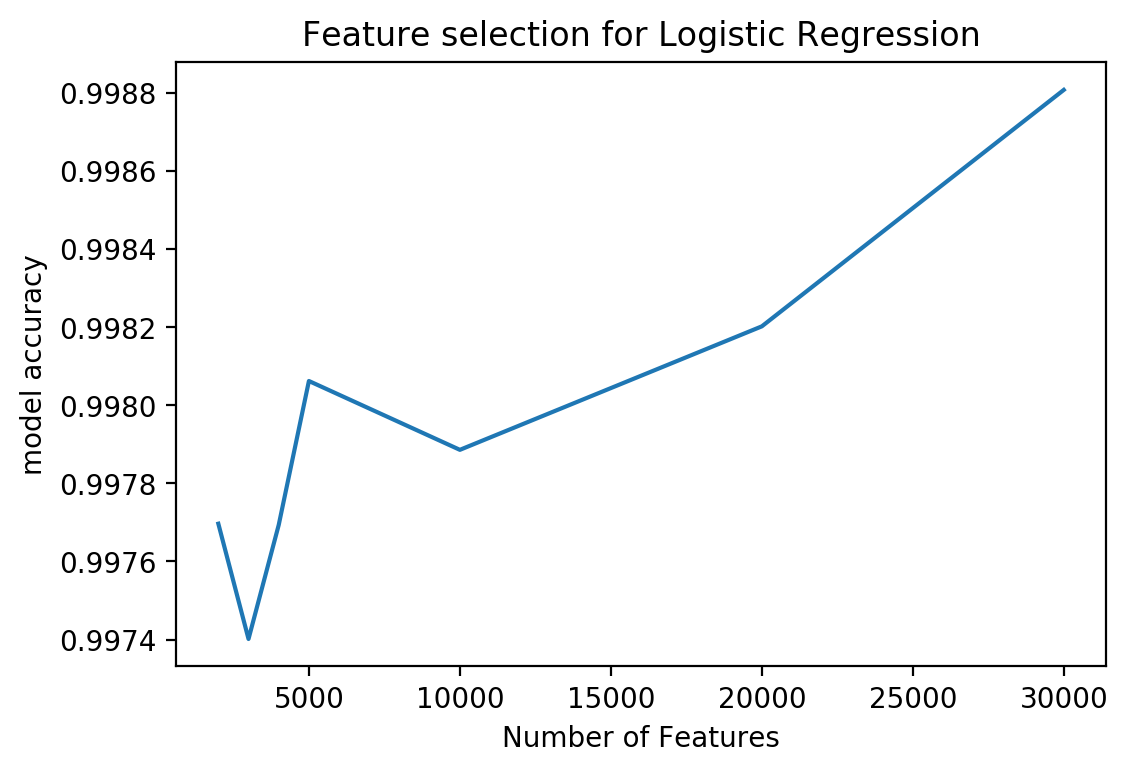

In [25]:
roc_labels = []
for k in [2000,3000,4000,5000,10000,20000,30000]:
    # convert to binary matrix, english stopwords
    tfidf_vectorizer = TfidfVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=k)
    X_idf = tfidf_vectorizer.fit_transform(X)
    # split test train
    X_train, X_test, Y_train, Y_test = train_test_split(X_idf, Y, train_size=.75)
    
    model = LogisticRegression()
    model.fit(X_train, Y_train)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    roc_label=auc(fpr,tpr)
    roc_labels.append(roc_label)
fig = plt.figure(dpi=200)
plt.xlabel("Number of Features")
plt.ylabel("model accuracy")
plt.title('Feature selection for Logistic Regression')
plt.plot([2000,3000,4000,5000,10000,20000,30000],roc_labels)

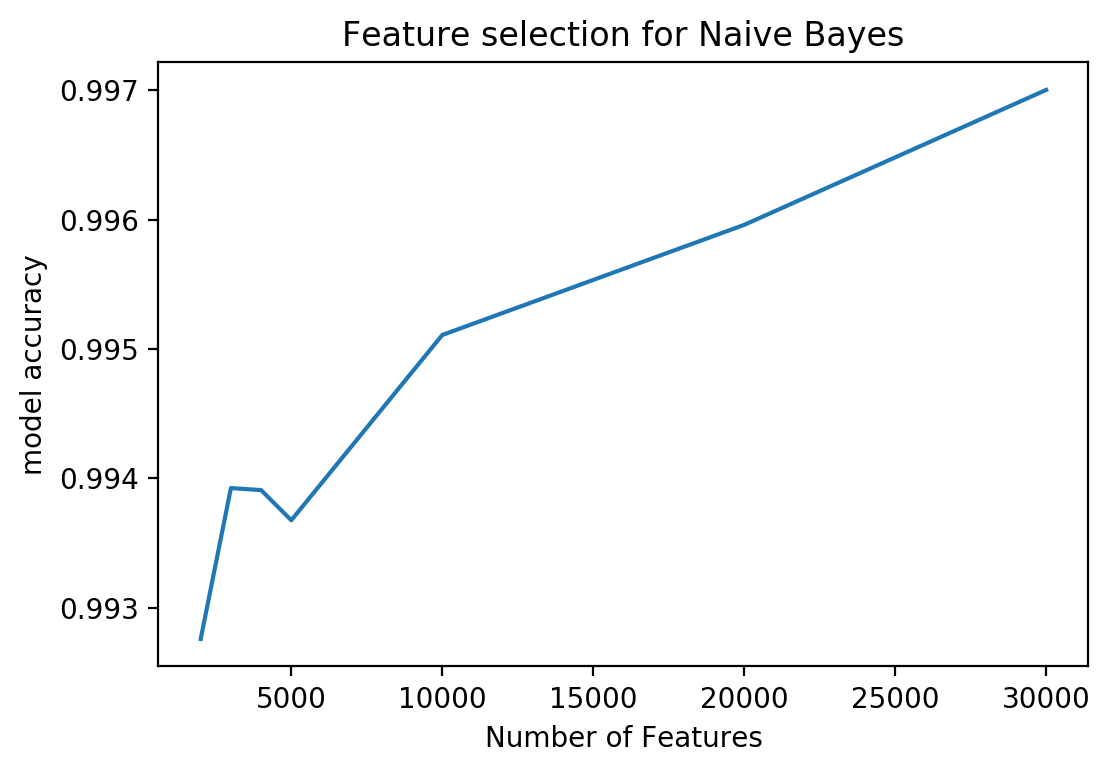

In [27]:
roc_labels = []
for k in [2000,3000,4000,5000,10000,20000,30000]:
    # convert to binary matrix, english stopwords
    tfidf_vectorizer = TfidfVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=k)
    X_idf = tfidf_vectorizer.fit_transform(X)
    # split test train
    X_train, X_test, Y_train, Y_test = train_test_split(X_idf, Y, train_size=.75)
    
    model = BernoulliNB()
    model.fit(X_train, Y_train)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    roc_label=auc(fpr,tpr)
    roc_labels.append(roc_label)
fig = plt.figure(dpi=200)
plt.xlabel("Number of Features")
plt.ylabel("model accuracy")
plt.title('Feature selection for Naive Bayes')
plt.plot([2000,3000,4000,5000,10000,20000,30000],roc_labels)

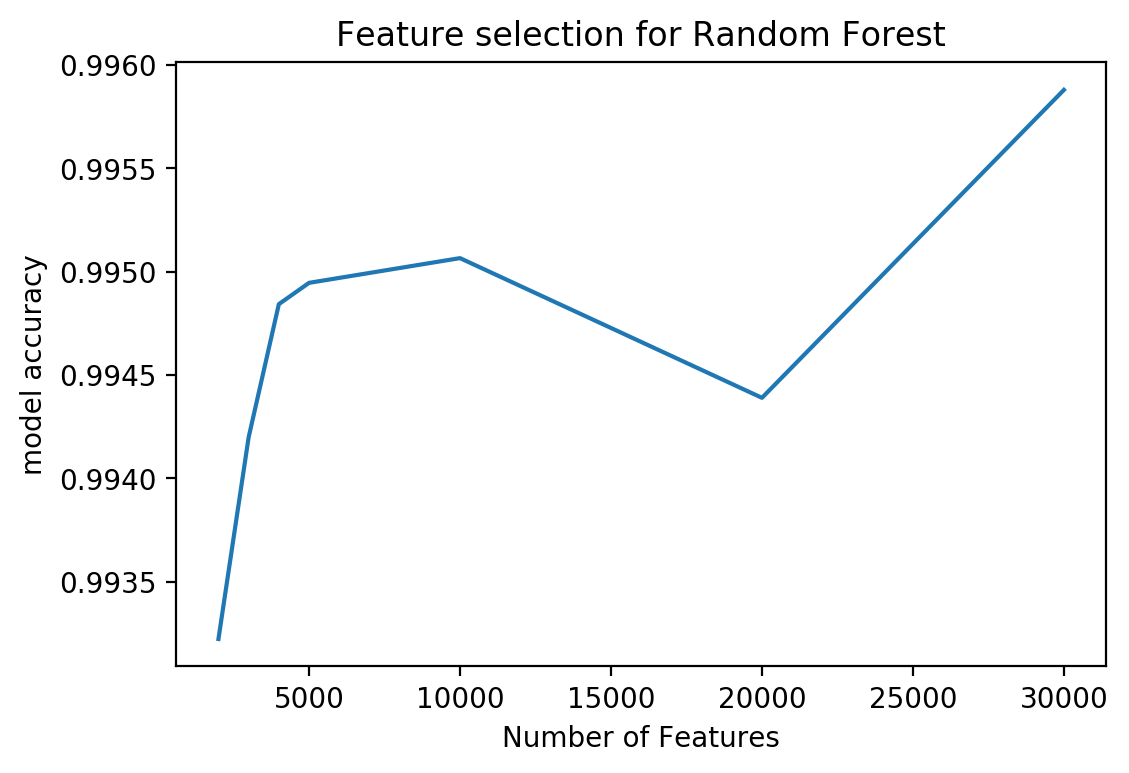

In [28]:
roc_labels = []
for k in [2000,3000,4000,5000,10000,20000,30000]:
    # convert to binary matrix, english stopwords
    tfidf_vectorizer = TfidfVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=k)
    X_idf = tfidf_vectorizer.fit_transform(X)
    # split test train
    X_train, X_test, Y_train, Y_test = train_test_split(X_idf, Y, train_size=.75)
    
    model = RandomForestClassifier()
    model.fit(X_train, Y_train)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    roc_label=auc(fpr,tpr)
    roc_labels.append(roc_label)
fig = plt.figure(dpi=200)
plt.xlabel("Number of Features")
plt.ylabel("model accuracy")
plt.title('Feature selection for Random Forest')
plt.plot([2000,3000,4000,5000,10000,20000,30000],roc_labels)

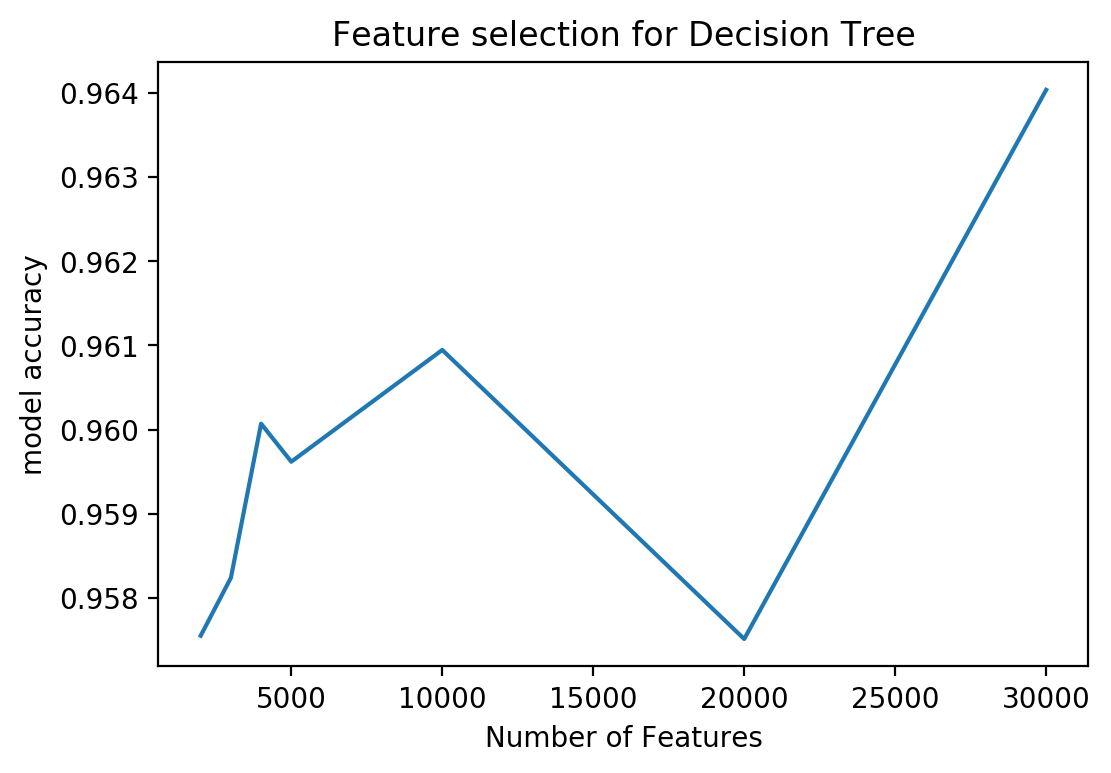

In [31]:
roc_labels = []
for k in [2000,3000,4000,5000,10000,20000,30000]:
    # convert to binary matrix, english stopwords
    tfidf_vectorizer = TfidfVectorizer(binary=True,ngram_range=(1, 2),stop_words='english',max_features=k)
    X_idf = tfidf_vectorizer.fit_transform(X)
    # split test train
    X_train, X_test, Y_train, Y_test = train_test_split(X_idf, Y, train_size=.75)
    
    model = DecisionTreeClassifier()
    model.fit(X_train, Y_train)
    fpr, tpr, thresholds = metrics.roc_curve(Y_test, model.predict_proba(X_test)[:,1])
    roc_label=auc(fpr,tpr)
    roc_labels.append(roc_label)
fig = plt.figure(dpi=200)
plt.xlabel("Number of Features")
plt.ylabel("model accuracy")
plt.title('Feature selection for Decision Tree')
plt.plot([2000,3000,4000,5000,10000,20000,30000],roc_labels)

# Final Model
#### Logistics Regression

In [3]:
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english',max_features=30000)
X_idf = tfidf_vectorizer.fit_transform(X)
# split test train
X_train, X_test, Y_train, Y_test = train_test_split(X_idf, Y, train_size=.75)

model = LogisticRegression()
model.fit(X_train, Y_train)
# print AUC curve
#pred = model.predict_proba(X_test_tfidf)[:,1]
#utils.plotAUC(Y_test, pred, 'Logistics Reg, Features=400')

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Naive Bayes

In [4]:
NB = BernoulliNB()
NB.fit(X_train, Y_train)
# print AUC curve
#pred = NB.predict_proba(X_test_tfidf)[:,1]
#utils.plotAUC(Y_test, pred, 'Naive Bayes, Features = 400')

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

#### Random Forest

In [5]:
forest = RandomForestClassifier(n_estimators = 100) 
forest = forest.fit( X_train, Y_train )
# print AUC curve
#pred = forest.predict_proba(X_test_tfidf)[:,1]
#utils.plotAUC(Y_test, pred, 'Random Forest, Features = 400')

#### Decision Tree

In [6]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit( X_train, Y_train )
# print AUC curve
#pred = clf.predict_proba(X_test_tfidf)[:,1]
#utils.plotAUC(Y_test, pred, 'Decision Tree, Features = 400')

In [8]:
tprs, fprs, roc_labels = utils.gather_auc(X_test, Y_test, model, NB, clf, forest)

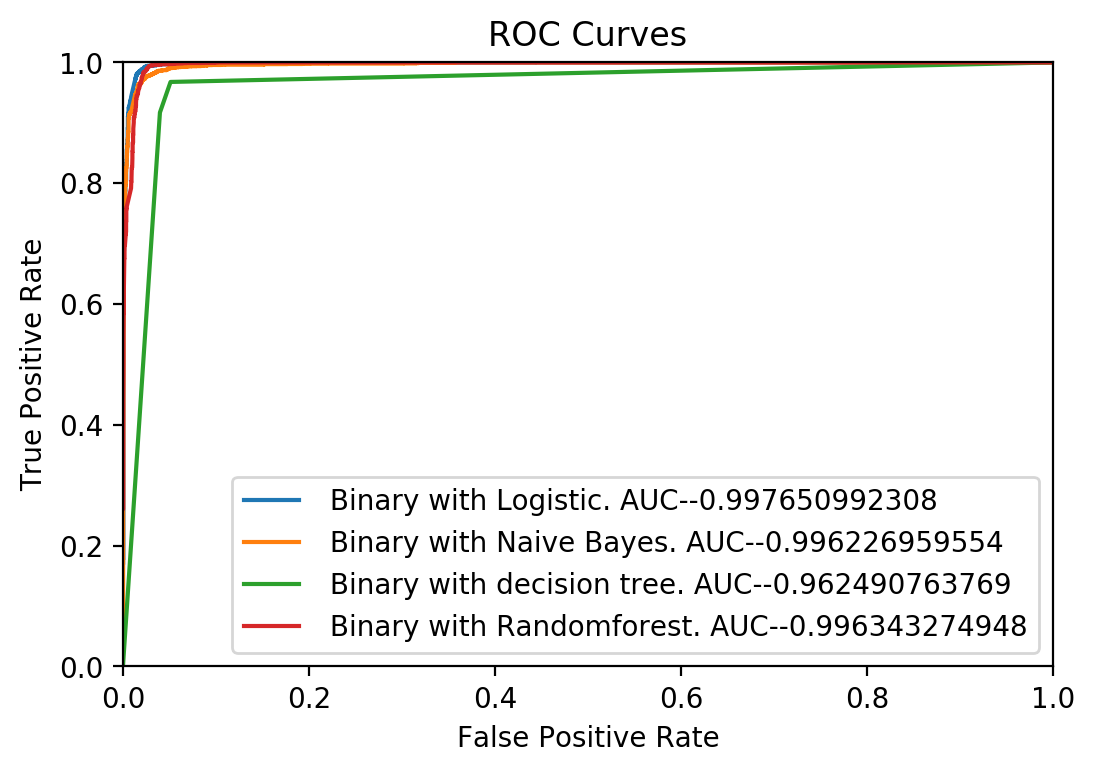

In [10]:
utils.plot_auc_together(tprs, fprs, roc_labels)

(81.440039780428094, 0.69432735836377191)

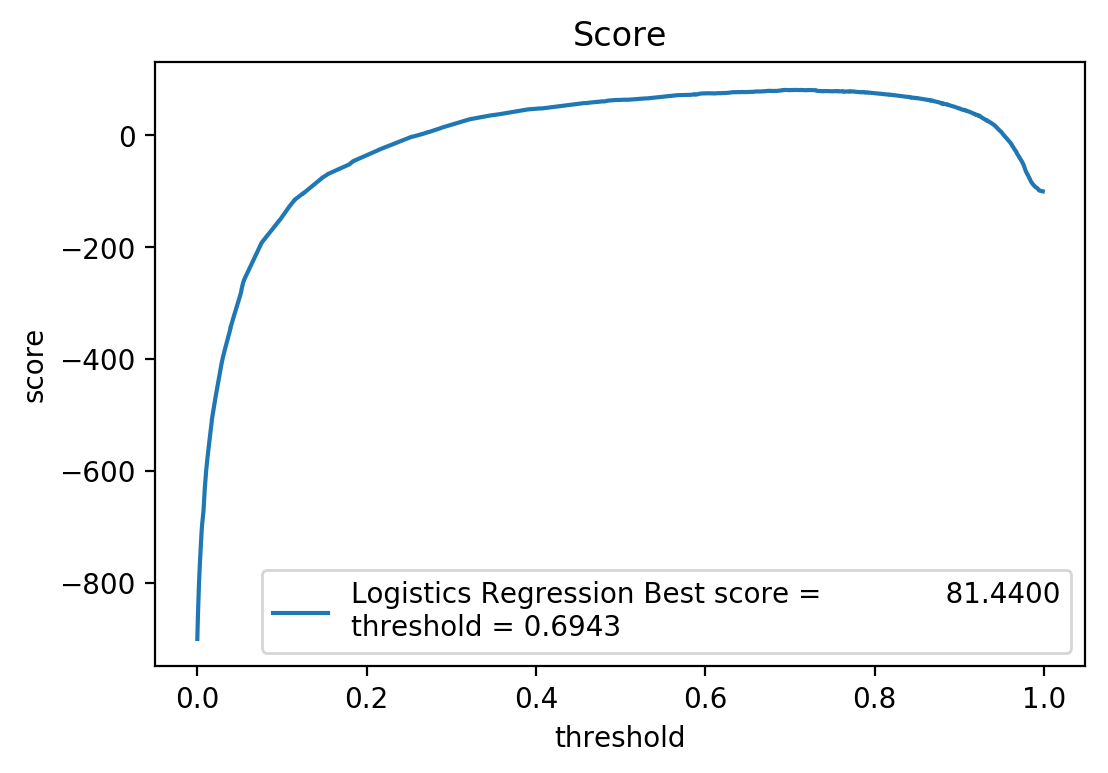

In [22]:
pred = model.predict_proba(X_test)[:,1]
utils.plotScore(Y_test, pred, 'Logistics Regression')

(81.440039780428094, 0.69432735836377191)

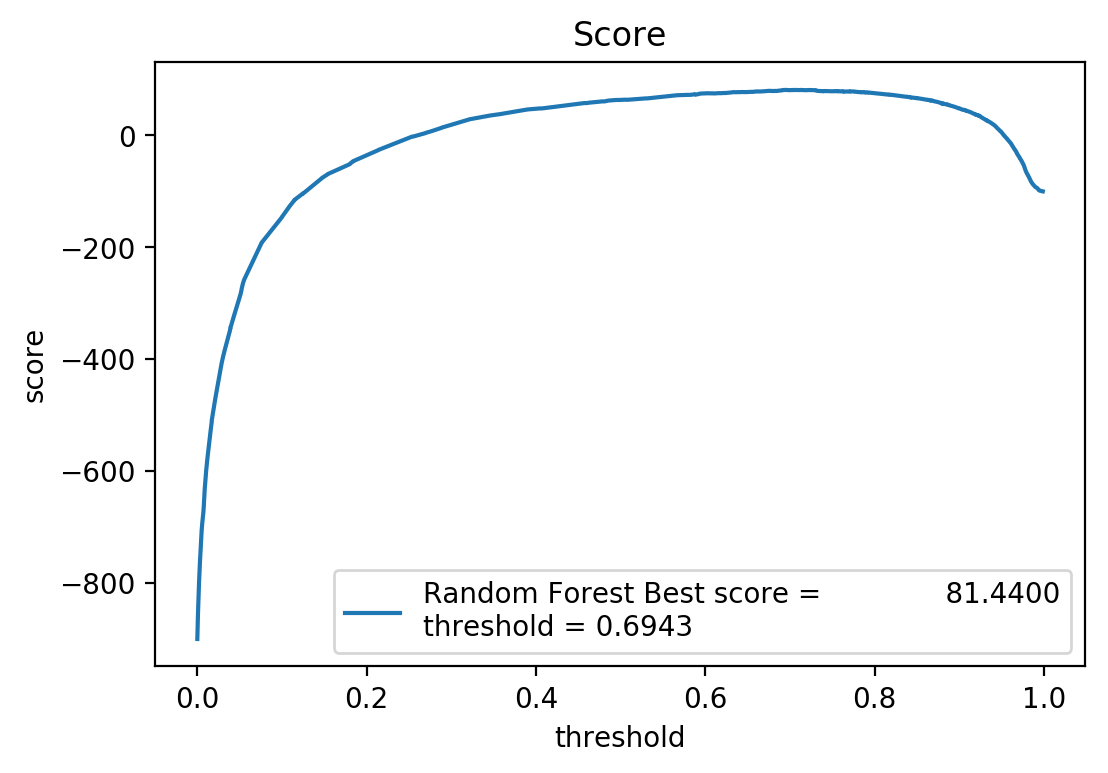

In [33]:
pred = model.predict_proba(X_test)[:,1]
utils.plotScore(Y_test, pred, 'Random Forest')

In [34]:
utils.confusion_mtx(Y_test, pred, best_threshold = 0.69)

,POS(Truth),Neg(Truth)
POS(Pred),0.984474,0.015526
Neg(Pred),0.018110,0.981890


In [35]:
utils.confusion_mtx(Y_test, pred,best_threshold = 0.5)

,POS(Truth),Neg(Truth)
POS(Pred),0.964580,0.035420
Neg(Pred),0.004644,0.995356


In [17]:
with open('forest_idf.model', 'wb') as handle:
    pickle.dump(forest, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('forest_idf.model', 'rb') as handle:
    forest = pickle.load(handle)

In [16]:

with open('tfidf_vectorizer.pk', 'wb') as handle:
    pickle.dump(tfidf_vectorizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('tfidf_vectorizer.pk', 'rb') as handle:
    tfidf_vectorizer = pickle.load(handle)